# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [12]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

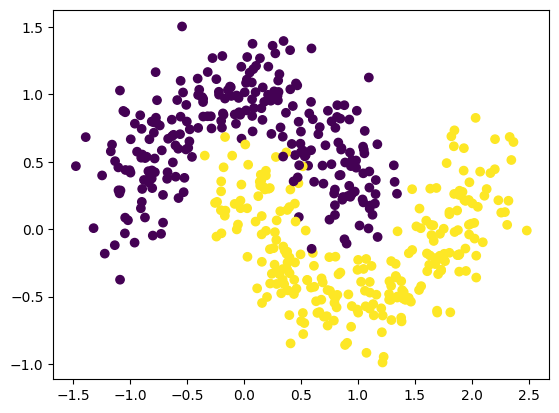

In [13]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

# Создание набора данных "moons"
moons_points, moons_labels = make_moons(n_samples=100, noise=0.2, random_state=42)

# Инициализация моделей
lr = LogisticRegression(penalty='l2', C=1.0)
svm = SVC(kernel='linear', C=1.0)

# Обучение моделей
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

SVC(kernel='linear')

In [21]:
# Функция для отображения границ решений
def plot_decisions(X, y, estimator, title='decision_regions'):
    plot_decision_regions(X, y, clf=estimator)
    plt.title(title)
    plt.show()

In [23]:
# Функция для вывода метрик классификации
def print_classification_metrics(estimator, est_name='estimator'):
    test_points, test_labels = make_moons(n_samples=100, noise=0.2, random_state=42)
    pred_labels = estimator.predict(test_points)

    accuracy = accuracy_score(test_labels, pred_labels)
    f1 = f1_score(test_labels, pred_labels)
    precision = precision_score(test_labels, pred_labels)
    recall = recall_score(test_labels, pred_labels)

    print(f'{est_name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

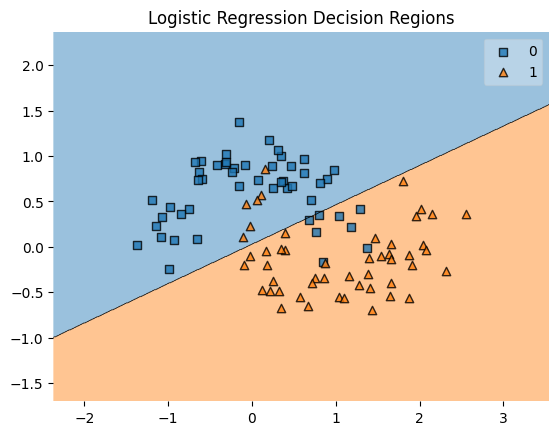

Logistic Regression - Accuracy: 0.86, F1 Score: 0.86, Precision: 0.85, Recall: 0.88


In [26]:
# Отображение графиков и метрик для Логистической Регрессии
plot_decisions(X=moons_points, y=moons_labels, estimator=lr, title='Logistic Regression Decision Regions')
print_classification_metrics(estimator=lr, est_name='Logistic Regression')

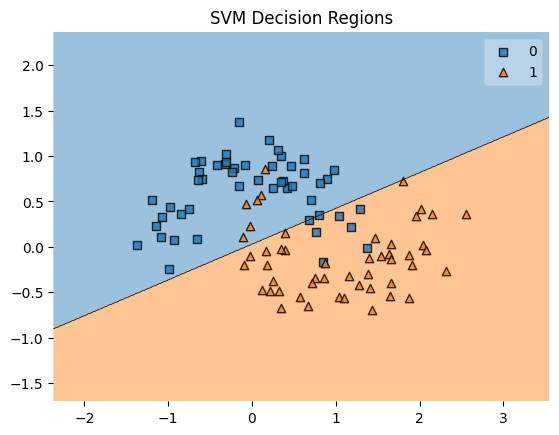

SVM - Accuracy: 0.87, F1 Score: 0.87, Precision: 0.86, Recall: 0.88


In [27]:
# Отображение графиков и метрик для SVM
plot_decisions(X=moons_points, y=moons_labels, estimator=svm, title='SVM Decision Regions')
print_classification_metrics(estimator=svm, est_name='SVM')

In [ ]:
# На графиках решений видно, что обе модели (логистическая регрессия и линейный SVM) создают прямолинейные границы решений,
# что логично для линейных классификаторов.
# Точность модели зависит от того, насколько хорошо она разделяет классы.
# В данном случае оба классификатора показывают достаточно хорошую точность,
# поскольку задача классификации с двумя полукругами ("moons") идеально подходит для линейных методов.

# В целом, обе модели имеют хорошие значения Precision и Recall, но SVM немного превосходит логистическую регрессию по точности (Precision),
# что может означать, что SVM немного лучше при минимизации ложных срабатываний.

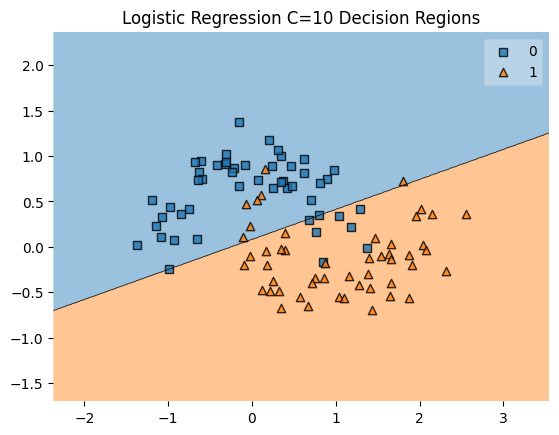

Logistic Regression C=10 - Accuracy: 0.86, F1 Score: 0.86, Precision: 0.86, Recall: 0.86


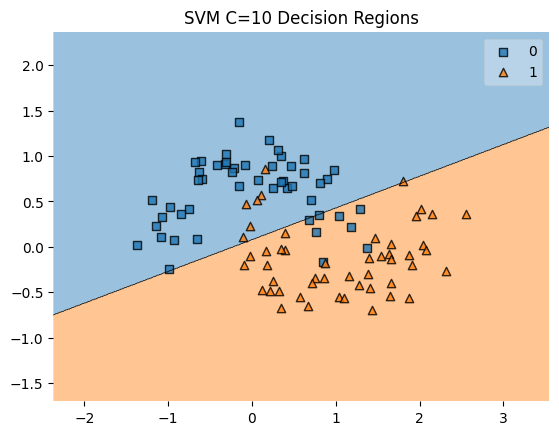

SVM C=10 - Accuracy: 0.85, F1 Score: 0.85, Precision: 0.84, Recall: 0.86


In [28]:
# Попробуем другие значения гиперпараметра C для SVM и LR
lr2 = LogisticRegression(penalty='l2', C=10.0)  # Большая регуляризация
svm2 = SVC(kernel='linear', C=10.0)  # Большая регуляризация

# Обучаем и отображаем для новых гиперпараметров
lr2.fit(moons_points, moons_labels)
svm2.fit(moons_points, moons_labels)

# Отображение и метрики для новых моделей
plot_decisions(X=moons_points, y=moons_labels, estimator=lr2, title='Logistic Regression C=10 Decision Regions')
print_classification_metrics(estimator=lr2, est_name='Logistic Regression C=10')

plot_decisions(X=moons_points, y=moons_labels, estimator=svm2, title='SVM C=10 Decision Regions')
print_classification_metrics(estimator=svm2, est_name='SVM C=10')

In [ ]:
# увеличение C, что приводит к меньшей регуляризации (модели пытаются точнее подстроиться под данные), не привело к значительным улучшениям,
# а для SVM даже немного ухудшило результат.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

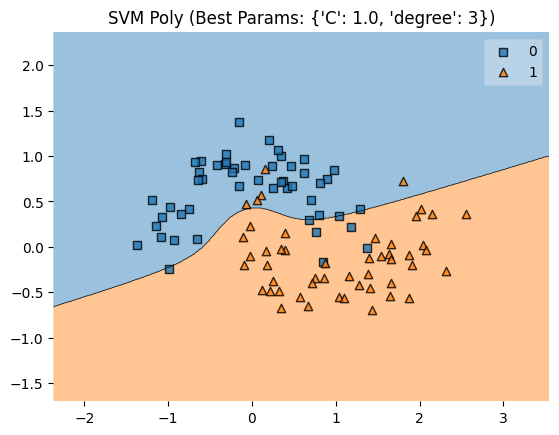

SVM Poly - Accuracy: 0.89, F1 Score: 0.89, Precision: 0.88, Recall: 0.90


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
# Сеточные параметры для полиномиального ядра
param_grid_poly = {'C': [0.1, 1.0, 10.0], 'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=3)
svm_poly.fit(moons_points, moons_labels)

# Полиномиальное ядро - отображение и метрики
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_poly.best_estimator_)
plt.title(f'SVM Poly (Best Params: {svm_poly.best_params_})')
plt.show()
print_classification_metrics(svm_poly.best_estimator_, 'SVM Poly')

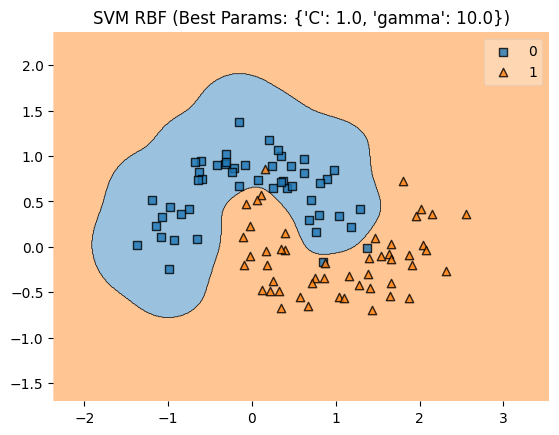

SVM RBF - Accuracy: 0.97, F1 Score: 0.97, Precision: 0.96, Recall: 0.98


In [44]:
# RBF ядро
param_grid_rbf = {'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 10.0]}
svm_rbf_grid = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=3)
svm_rbf_grid.fit(moons_points, moons_labels)

# RBF ядро - отображение и метрики
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_rbf_grid.best_estimator_)
plt.title(f'SVM RBF (Best Params: {svm_rbf_grid.best_params_})')
plt.show()
print_classification_metrics(svm_rbf_grid.best_estimator_, 'SVM RBF')

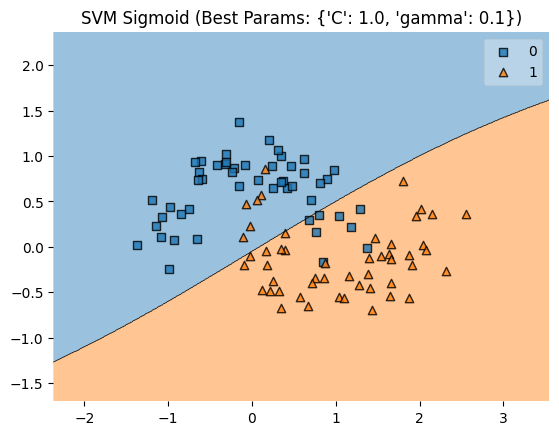

SVM Sigmoid - Accuracy: 0.86, F1 Score: 0.86, Precision: 0.85, Recall: 0.88


In [45]:
# Сигмоидальное ядро
param_grid_sigmoid = {'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 10.0]}
svm_sigmoid_grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid_sigmoid, cv=3)
svm_sigmoid_grid.fit(moons_points, moons_labels)

# Сигмоидальное ядро - отображение и метрики
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_sigmoid_grid.best_estimator_)
plt.title(f'SVM Sigmoid (Best Params: {svm_sigmoid_grid.best_params_})')
plt.show()
print_classification_metrics(svm_sigmoid_grid.best_estimator_, 'SVM Sigmoid')

In [46]:
# RBF ядро: самое высокое качество — Accuracy и F1-Score составляют 0.97.
# Это говорит о том, что RBF ядро лучше всех захватывает нелинейные зависимости в данных.
# Граница решений наиболее плавная и точно адаптирована к форме данных. Это объясняет высокий показатель Recall (0.98)

**Ответы на вопросы:**

Что произошло с качеством классификации?
- Качество классификации улучшилось с использованием более сложных ядер (Poly и RBF). Особенно выделяется RBF ядро, которое достигает почти идеальных результатов на данных с нелинейной структурой. Poly также показывает хорошее улучшение по сравнению с линейным ядром, но уступает RBF.

Как изменилась граница решений для каждого ядра?

- Poly: Границы стали нелинейными, что позволяет учитывать сложные взаимодействия между классами, но они всё же более жесткие, чем у RBF.
- RBF: Границы наиболее гибкие, плавные и точно повторяют форму данных. Это позволяет RBF ядру выдавать лучший результат.
- Sigmoid: Границы выглядят сглаженными, но они хуже учитывают локальные особенности данных, что сказывается на результатах.

Какую степень (degree) вы выбрали и почему?
- Для полиномиального ядра была выбрана степень 3 (degree=3). Это оптимальный выбор, так как степень 2 может быть недостаточно гибкой, а более высокая степень (например, 4 или 5) может привести к переобучению, особенно на небольших объемах данных. Degree=3 обеспечивает баланс между сложностью модели и ее обобщающей способностью.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

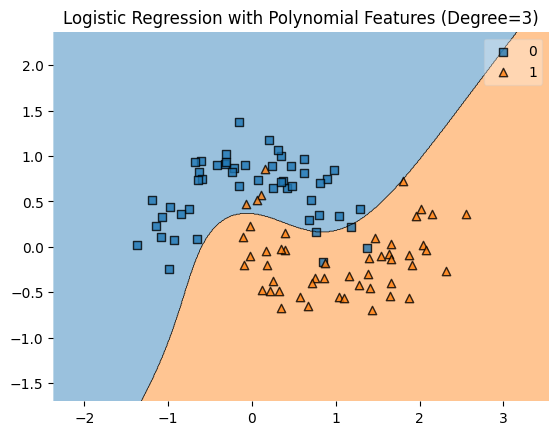

Logistic Regression with Polynomial Features - Degree 3
Accuracy: 0.92, F1 Score: 0.92, Precision: 0.92, Recall: 0.92


In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generate polynomial features and train logistic regression
degree = 3  # Degree of PolynomialFeatures (to match SVM poly kernel degree)
poly_lr = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression(penalty='l2', C=1.0, max_iter=1000))
])

# Fit the pipeline
poly_lr.fit(moons_points, moons_labels)

# Plot decision regions
plot_decision_regions(X=moons_points, y=moons_labels, clf=poly_lr)
plt.title(f'Logistic Regression with Polynomial Features (Degree={degree})')
plt.show()

# Evaluate the model on a test set
test_points, test_labels = make_moons(n_samples=100, noise=0.2, random_state=42)
pred_labels = poly_lr.predict(test_points)

accuracy = accuracy_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)

print(f'Logistic Regression with Polynomial Features - Degree {degree}')
print(f'Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

**Ответы на вопросы:**

Какая степень PolynomialFeatures использовалась?
- Использовалась степень 3 для преобразования признаков. Это соответствует параметру degree=3 в SVM с полиномиальным ядром, что позволяет корректно сравнить их результаты.

Сравнение результатов Logistic Regression (LR) и SVM (с полиномиальным ядром, degree=3):
- LR с полиномиальными признаками показывает лучшие метрики, чем SVM с полиномиальным ядром. Это связано с использованием регуляризации (L2 penalty) в логистической регрессии, которая помогает сгладить границы и уменьшить влияние переобучения.
- Оба метода создают нелинейные границы, адаптированные к форме набора данных.
У Logistic Regression границы выглядят плавнее, благодаря регуляризации.
У SVM границы более резкие


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

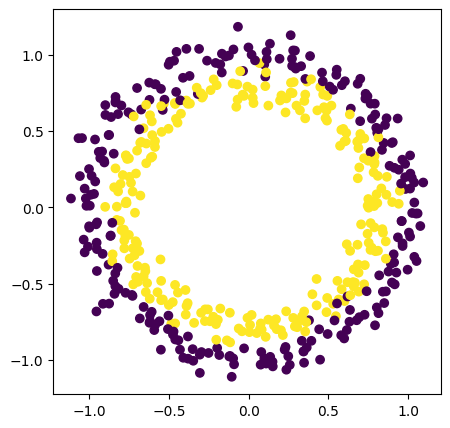

In [68]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

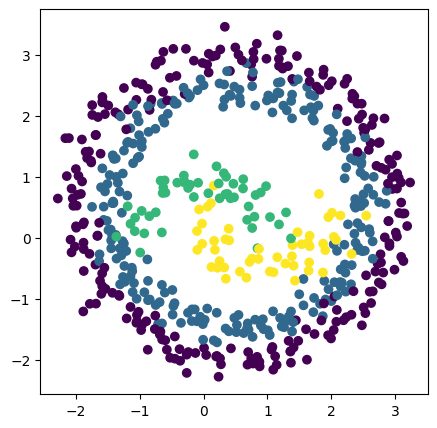

In [69]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


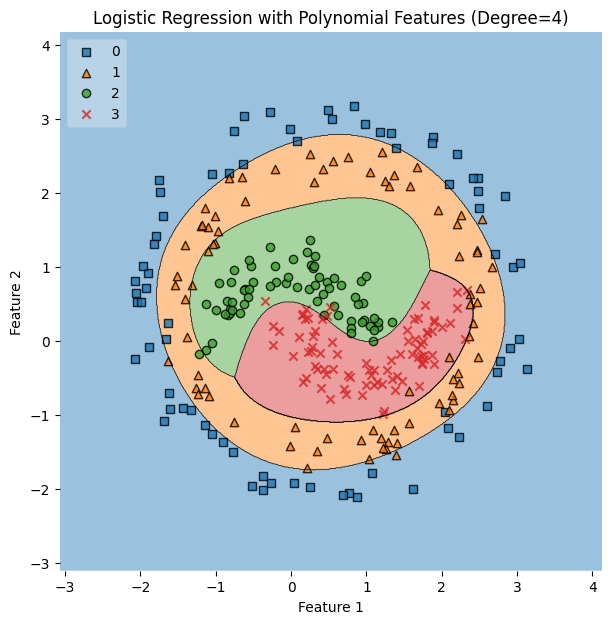

Logistic Regression (Poly):
  Accuracy: 0.94, F1 Score: 0.94, Precision: 0.94, Recall: 0.94



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


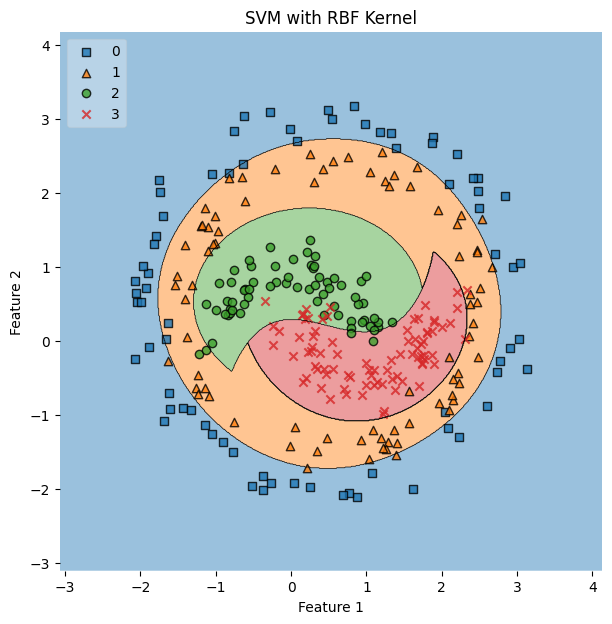

SVM (RBF Kernel):
  Accuracy: 0.91, F1 Score: 0.91, Precision: 0.92, Recall: 0.91



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


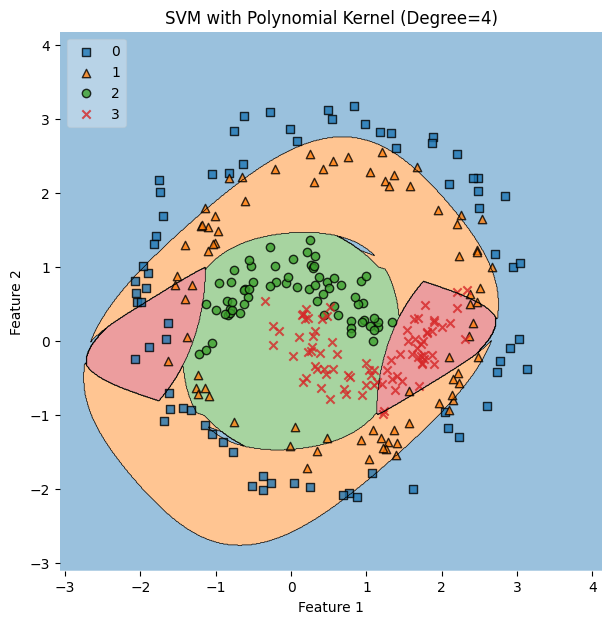

SVM (Polynomial Kernel):
  Accuracy: 0.66, F1 Score: 0.65, Precision: 0.69, Recall: 0.66



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


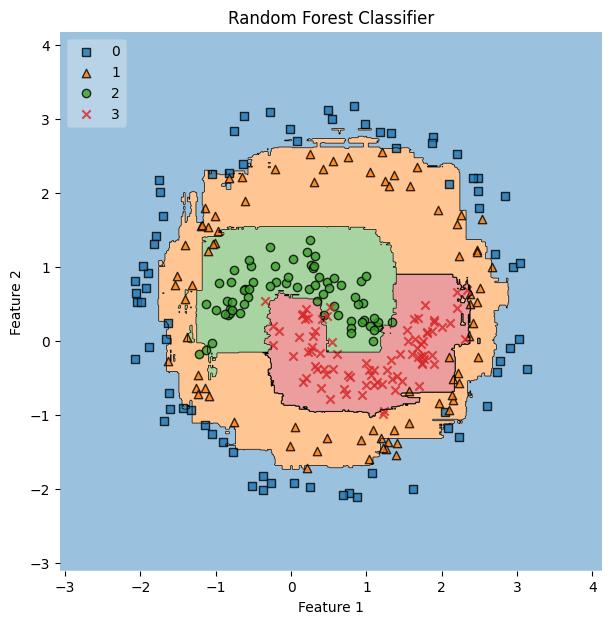

Random Forest:
  Accuracy: 0.90, F1 Score: 0.90, Precision: 0.90, Recall: 0.90



In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions


# Функция для оценки модели
def evaluate_classifier(model, model_name, X_test, y_test):
    pred_labels = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred_labels)
    f1 = f1_score(y_test, pred_labels, average='weighted')
    precision = precision_score(y_test, pred_labels, average='weighted')
    recall = recall_score(y_test, pred_labels, average='weighted')
    print(f"{model_name}:\n  Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}\n")

# Функция для построения границ решений
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(7, 7))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Основной код
X_train, X_test, y_train, y_test = generate_data()

# Logistic Regression с Polynomial Features
degree = 4
poly_lr = make_pipeline(PolynomialFeatures(degree=degree), LogisticRegression(penalty='l2', C=1.0, max_iter=1000))
poly_lr.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, poly_lr, f"Logistic Regression with Polynomial Features (Degree={degree})")
evaluate_classifier(poly_lr, "Logistic Regression (Poly)", X_test, y_test)

# SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, svm_rbf, "SVM with RBF Kernel")
evaluate_classifier(svm_rbf, "SVM (RBF Kernel)", X_test, y_test)

# SVM с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=degree, C=1.0)
svm_poly.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, svm_poly, f"SVM with Polynomial Kernel (Degree={degree})")
evaluate_classifier(svm_poly, "SVM (Polynomial Kernel)", X_test, y_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, rf, "Random Forest Classifier")
evaluate_classifier(rf, "Random Forest", X_test, y_test)


- Лучший выбор для данной задачи: Logistic Regression с полиномиальными признаками.
- SVM с RBF ядром также показывает достойные результаты, уступая только логистической регрессии.
- Неудачное решение: SVM с полиномиальным ядром из-за сложности параметров и недостаточной гибкости.
- Random Forest — хорошая альтернатива, особенно для смешанных данных, но с менее точными границами решений.